In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import calendar 
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec

In [2]:
# Load precipitation data

url = 'https://psl.noaa.gov/thredds/dodsC/Datasets/cmap/enh/precip.mon.ltm.1981-2010.nc'

In [3]:
ds =xr.open_dataset(url, decode_times=False)

In [4]:
ds

<xarray.Dataset>
Dimensions:             (lat: 72, lon: 144, time: 12, nbnds: 2)
Coordinates:
  * lat                 (lat) float32 88.75 86.25 83.75 ... -83.75 -86.25 -88.75
  * lon                 (lon) float32 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
  * time                (time) float64 -1.577e+07 -1.577e+07 ... -1.576e+07
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) float64 ...
    precip              (time, lat, lon) float32 ...
    valid_yr_count      (time, lat, lon) float32 ...
Attributes: (12/13)
    Conventions:                    COARDS
    title:                          CPC Merged Analysis of Precipitation (inc...
    platform:                       Analyses
    source:                         ftp ftp.cpc.ncep.noaa.gov precip/cmap/mon...
    dataset_title:                  CPC Merged Analysis of Precipitation
    documentation:                  https://www.esrl.noaa.gov/psd/data/gridde...
    ...                             ...
    References:                     https://www.psl.noaa.gov/data/gridded/dat...
    version:                        V2212
    history:                        Created 2022/12/28 by doMonthLTMNC4
    data_modified:                  2022-12-28
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...
    _NCProperties:                  version=2,netcdf=4.7.0,hdf5=1.10.5,

In [5]:
print(ds.variables)

Frozen({'lat': <xarray.IndexVariable 'lat' (lat: 72)>
array([ 88.75,  86.25,  83.75,  81.25,  78.75,  76.25,  73.75,  71.25,  68.75,
        66.25,  63.75,  61.25,  58.75,  56.25,  53.75,  51.25,  48.75,  46.25,
        43.75,  41.25,  38.75,  36.25,  33.75,  31.25,  28.75,  26.25,  23.75,
        21.25,  18.75,  16.25,  13.75,  11.25,   8.75,   6.25,   3.75,   1.25,
        -1.25,  -3.75,  -6.25,  -8.75, -11.25, -13.75, -16.25, -18.75, -21.25,
       -23.75, -26.25, -28.75, -31.25, -33.75, -36.25, -38.75, -41.25, -43.75,
       -46.25, -48.75, -51.25, -53.75, -56.25, -58.75, -61.25, -63.75, -66.25,
       -68.75, -71.25, -73.75, -76.25, -78.75, -81.25, -83.75, -86.25, -88.75],
      dtype=float32)
Attributes:
    units:          degrees_north
    actual_range:   [ 88.75 -88.75]
    long_name:      Latitude
    standard_name:  latitude
    axis:           Y, 'lon': <xarray.IndexVariable 'lon' (lon: 144)>
array([  1.25,   3.75,   6.25,   8.75,  11.25,  13.75,  16.25,  18.75,  21.25,
   

In [6]:
ds['precip']

<xarray.DataArray 'precip' (time: 12, lat: 72, lon: 144)>
[124416 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) float64 -1.577e+07 -1.577e+07 ... -1.576e+07 -1.576e+07
Attributes:
    long_name:     Long Term Mean Average Monthly Rate of Precipitation
    valid_range:   [ 0. 70.]
    units:         mm/day
    precision:     2
    var_desc:      Precipitation
    dataset:       CPC Merged Analysis of Precipitation Enhanced
    level_desc:    Surface
    statistic:     Long Term Mean
    parent_stat:   Mean
    actual_range:  [ 0.      22.38667]
    _ChunkSizes:   [  1  72 144]

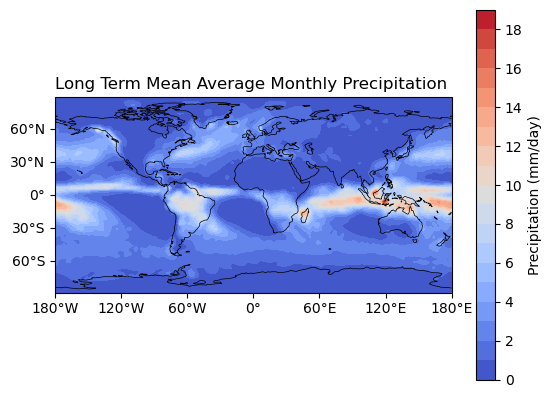

In [7]:


lon_values = ds['lon'].values
new_lon_values = np.linspace(lon_values.min(), lon_values.max(), len(lon_values))

data = ds['precip']
data, lons = add_cyclic_point(data, coord=new_lon_values)


fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})


ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)


ax.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(plt.FixedFormatter(['180°W', '120°W', '60°W', '0°', '60°E', '120°E', '180°E']))
ax.yaxis.set_major_formatter(plt.FixedFormatter(['90°S', '60°S', '30°S', '0°', '30°N', '60°N', '90°N']))


contour = ax.contourf(lons, ds['lat'], data[0, :, :], levels=20, cmap='coolwarm')


colorbar = plt.colorbar(contour, label='Precipitation (mm/day)')

plt.title('Long Term Mean Average Monthly Precipitation ')
plt.show()



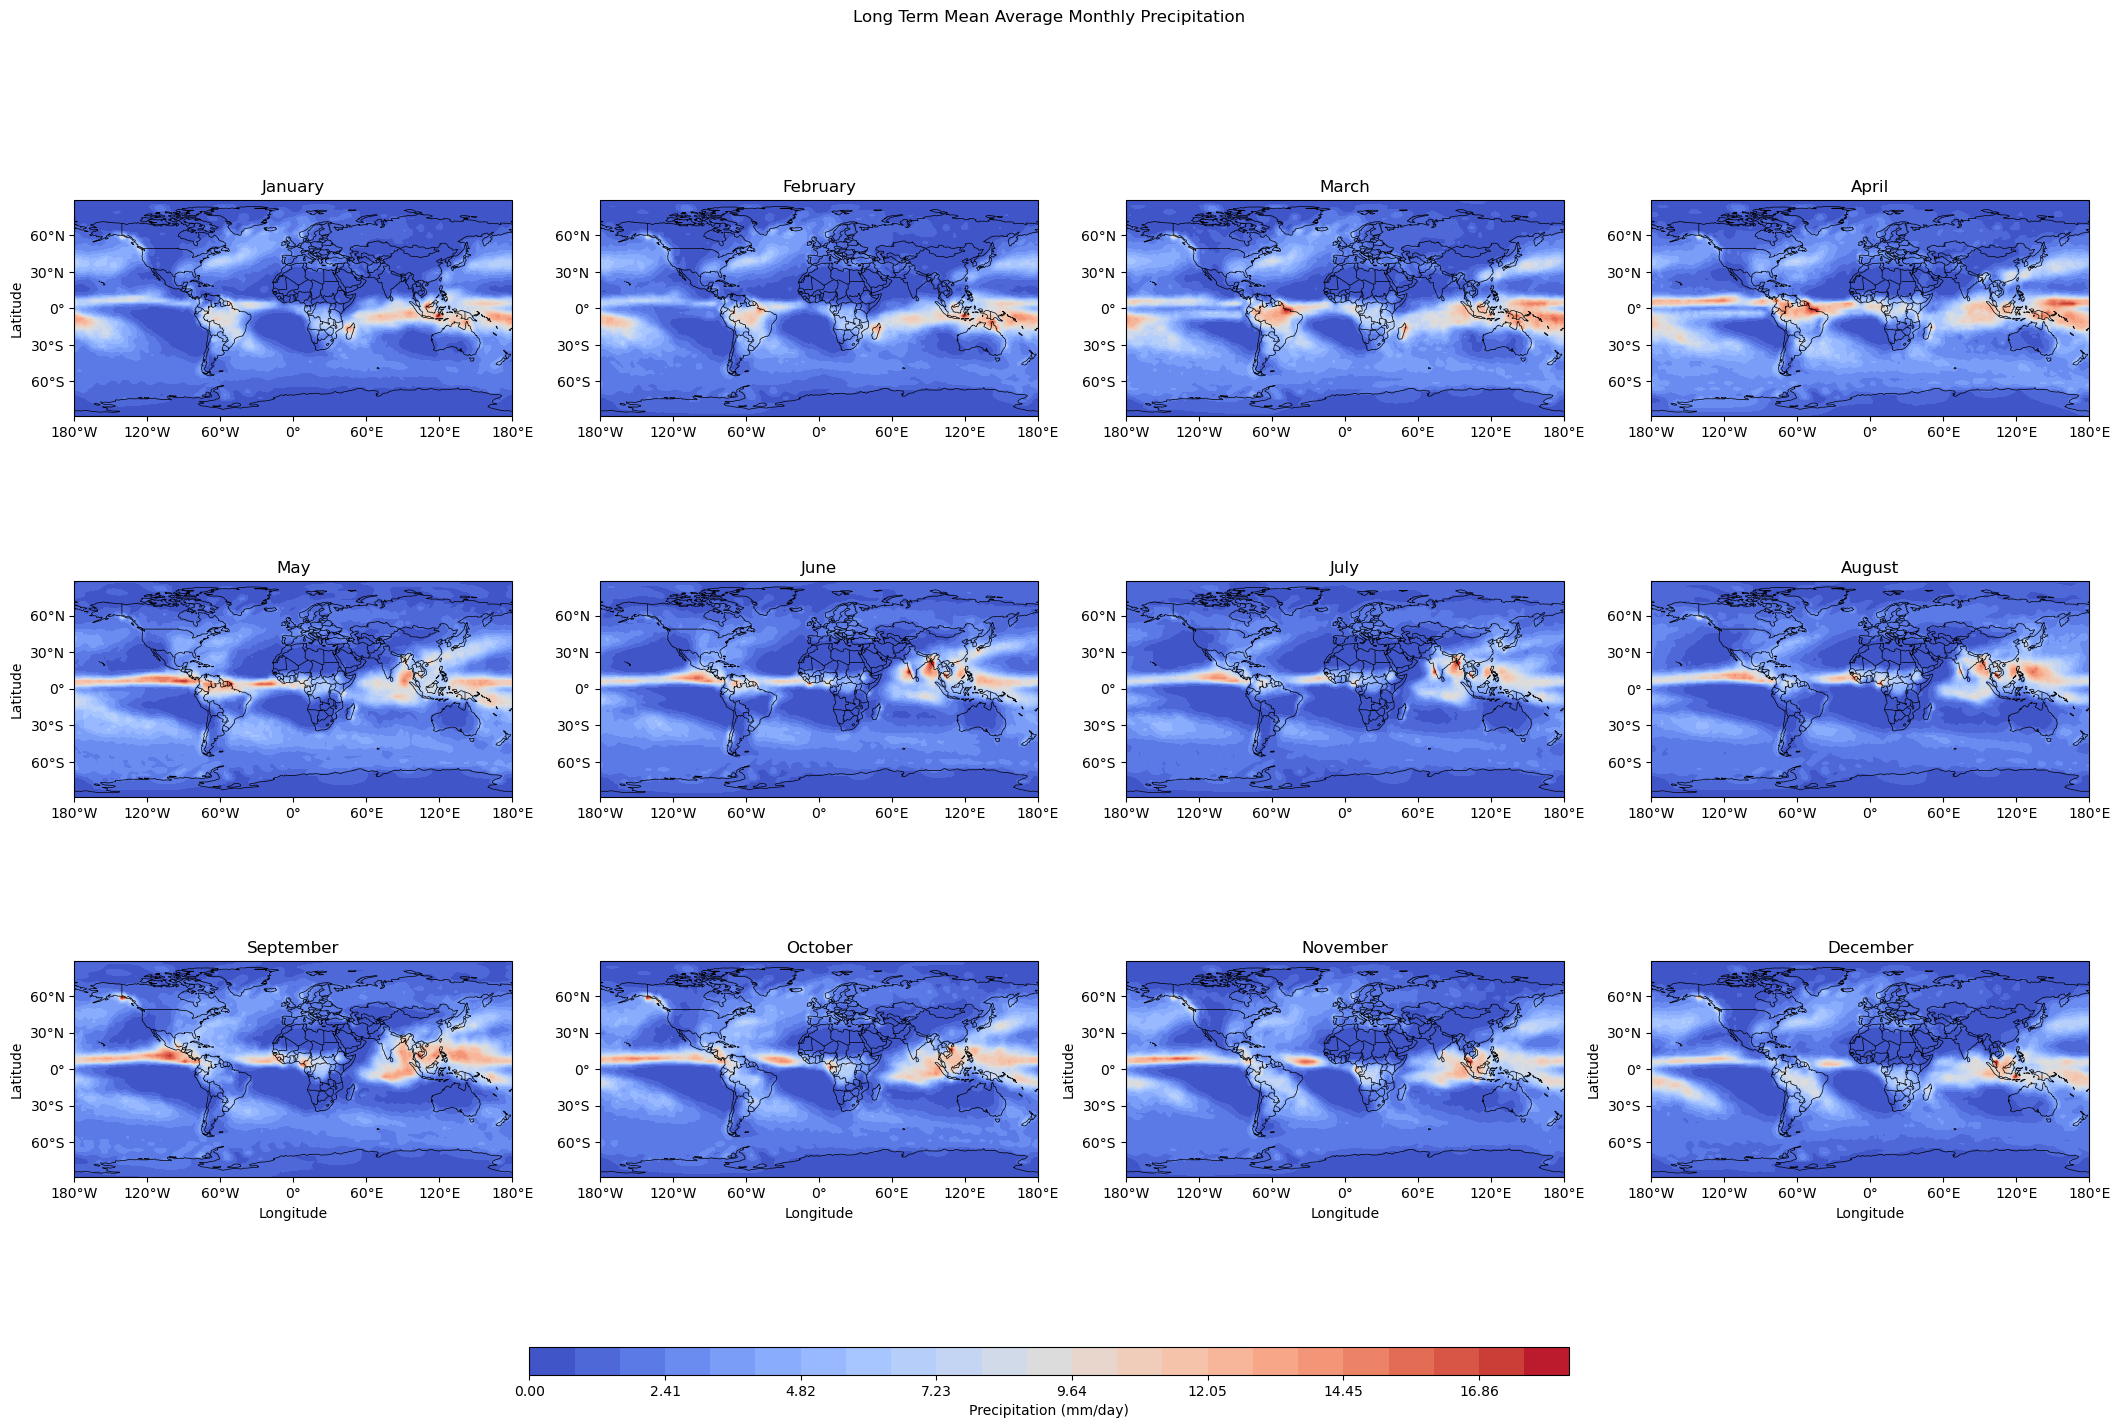

In [8]:

data = ds['precip']

data, lons = add_cyclic_point(data, coord=ds['lon'])


month_names = [calendar.month_name[i] for i in range(1, 13)]


fig, axes = plt.subplots(3, 4, figsize=(26, 14), subplot_kw={'projection': ccrs.PlateCarree()})
cbar_ax = fig.add_axes([0.3, 0.005, 0.4, 0.02])


for ax in axes.ravel():
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.LAND, facecolor='none', edgecolor='k')
    

for month, ax in enumerate(axes.ravel()):
    precip_slice = data[month, :, :]
    
    
    
    
    ax.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(plt.FixedFormatter(['180°W', '120°W', '60°W', '0°', '60°E', '120°E', '180°E']))
    ax.yaxis.set_major_formatter(plt.FixedFormatter(['90°S', '60°S', '30°S', '0°', '30°N', '60°N', '90°N']))
    
    
 
    
    levels = np.linspace(precip_slice.min(), precip_slice.max(), 24)
    
    contour = ax.contourf(lons, ds['lat'], precip_slice, levels=levels, cmap='coolwarm')
    
    
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('month' + str(month +1))
    ax.set_title(month_names[month])

   
        
    if month == 0 or month == 4:
        
        ax.set_title(month_names[month])

        ax.set_xlabel('')
        
    elif month == 9:
        
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude and Longitude')
    else:
       
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')

    if month in [1, 2, 3, 5, 6, 7, 9]:
        ax.set_xlabel('')
        ax.set_ylabel('')

    if month == 9:
        ax.set_ylabel('')
        ax.set_xlabel('Longitude')
        

fig.suptitle('Long Term Mean Average Monthly Precipitation')

cbar = plt.colorbar(contour, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Precipitation (mm/day)') 

plt.show()

